# This is a regression problem to predict Score of the student.
The dataset contains 25 entries and 2 variables hours and score.
In this regression task we will predict the percentage of marks that
a student is expected to score based upon the number of hours they studied
Data can be found at http://bit.ly/w-data     
      
      
      
      

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
#load the data
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

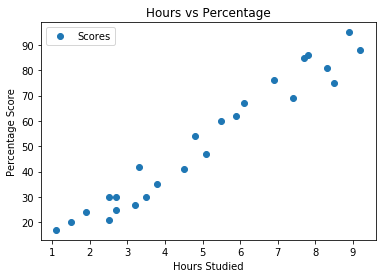

In [7]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [8]:
#seperating features and labels
features=data.iloc[:,[0]].values
labels=data.iloc[:,[1]].values

In [9]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                labels,
                                                test_size=0.2,
                                                random_state=52)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Checking for the Quality of The model
# 1. Checking whether the model is a generalized model or not

In [12]:

#1. Check for Generalization
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
print("The R Square of the model is " ,model.score(X_train,y_train))
print("The Coefficient if Regression is" ,model.coef_)
print("The Intercept of the model is " ,model.intercept_)

0.9513246844443373
0.9423300619774673
The R Square of the model is  0.9513246844443373
The Coefficient if Regression is [[9.68936358]]
The Intercept of the model is  [2.85258574]


In [13]:
#Manually calculate the predictions
#scores=9.68936358*hours+2.85258574

In [14]:
y_pred=model.predict(X_test)

In [15]:
y_pred

array([[56.14408544],
       [29.01386742],
       [61.95770359],
       [13.51088568],
       [36.76535828]])

In [16]:
#summary of actual and predicted
y_test1=list(y_test)
y_pred1=list(y_pred)
comp= pd.DataFrame({'Actual': y_test1, 'Result': y_pred1})  
comp

,Actual,Result
0,[60],[56.144085444735424]
1,[25],[29.013867415517627]
2,[67],[61.95770359385352]
3,[17],[13.510885684536028]
4,[30],[36.765358281008425]


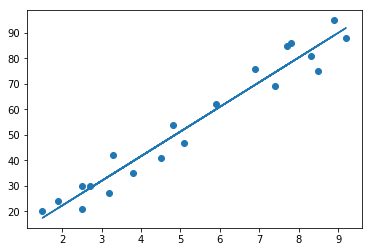

In [17]:
# Plotting the regression line
line = model.coef_*X_train+model.intercept_

# Plotting for the test data
plt.scatter(X_train, y_train)
plt.plot(X_train, line);
plt.show()

# Deployment

In [19]:

#User Interaction Test
hours= float(input("Enter hours of study "))
scores = model.predict(features)
features = np.array([[hours]])
print("Predicted score is",scores)

Enter hours of study 9.25
Predicted score is [[92.47919888]]
